## Load dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset_path = '../dataset/Breast_GSE45827.csv'
df = pd.read_csv(dataset_path, index_col=0)
df.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [3]:
df.info()

print(df.shape)

print(df.type.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 84 to 238
Columns: 54676 entries, type to AFFX-TrpnX-M_at
dtypes: float64(54675), object(1)
memory usage: 63.0+ MB
(151, 54676)
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64


Text(0.5, 0, 'Type')

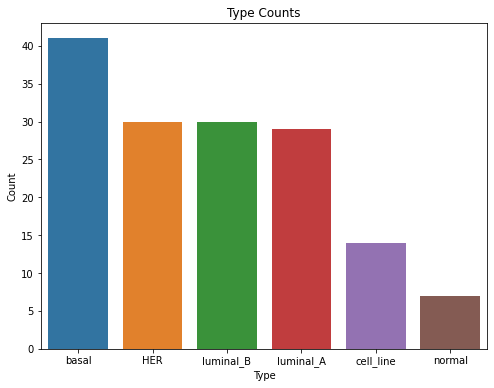

In [4]:
type_counts = df.type.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Type Counts')
plt.ylabel('Count')
plt.xlabel('Type')


## Preprocess data 

In [5]:
df.type.isnull().sum()

0

In [6]:
X = df.drop(columns=['type'])
y = df.type

In [7]:
unique_classes = y.unique()
class_mapping = {label: idx for idx, label in enumerate(unique_classes)}

y = y.map(class_mapping)

In [8]:
X_norm = (X - X.mean()) / X.std()

### Save normalized dataset

In [9]:
df_norm = pd.concat([X_norm, y], axis=1)
df_norm.head()

df_norm.describe()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type
count,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,...,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,151.000000
mean,-5.411418e-16,-2.352791e-17,8.470046e-16,-4.117383e-16,9.881720e-16,1.576370e-15,1.599898e-15,2.940988e-18,-1.305799e-15,8.470046e-16,...,-2.352791e-17,1.882232e-15,-9.411162e-17,1.882232e-16,-6.587813e-16,5.176139e-16,7.528930e-16,-4.435010e-15,-1.858705e-15,2.284768
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.957473
min,-4.618853e+00,-2.513847e+00,-2.264029e+00,-2.137196e+00,-2.672404e+00,-2.888225e+00,-2.299906e+00,-2.489162e+00,-2.379286e+00,-1.294768e+00,...,-2.389091e+00,-2.359905e+00,-2.002501e+00,-2.205890e+00,-1.594736e+00,-1.975259e+00,-1.989534e+00,-2.232599e+00,-2.320505e+00,0.000000
25%,-3.845021e-01,-6.593905e-01,-6.612573e-01,-7.055268e-01,-6.883096e-01,-6.786215e-01,-6.504053e-01,-8.032253e-01,-5.965090e-01,-5.692323e-01,...,-6.238994e-01,-8.307853e-01,-8.604868e-01,-8.592754e-01,-8.497816e-01,-8.901273e-01,-6.144960e-01,-6.277257e-01,-6.290096e-01,0.000000
50%,1.270176e-01,-1.418853e-01,1.578559e-02,-1.759897e-02,1.542691e-02,1.664447e-01,-1.657686e-01,-1.657374e-01,7.556038e-02,-2.785485e-01,...,1.992809e-02,-6.182836e-02,-1.123843e-01,2.022623e-01,-2.434728e-01,2.466885e-02,-7.559986e-02,-6.122684e-02,-1.046280e-01,2.000000
75%,6.458874e-01,5.972297e-01,6.002249e-01,5.254582e-01,5.988596e-01,7.017162e-01,4.522768e-01,7.364833e-01,6.675429e-01,3.007636e-01,...,5.362657e-01,8.445096e-01,8.775924e-01,6.686222e-01,8.712180e-01,9.027630e-01,4.563251e-01,5.126125e-01,5.465106e-01,4.000000
max,2.178204e+00,2.824062e+00,3.315382e+00,3.127939e+00,2.683160e+00,1.960867e+00,3.522018e+00,3.820817e+00,2.379956e+00,6.075792e+00,...,3.505608e+00,2.381075e+00,2.442604e+00,3.111896e+00,2.803262e+00,3.078032e+00,4.332854e+00,3.692131e+00,2.727860e+00,5.000000


In [10]:
def save_df(df, path):
    df.to_csv(path, index=False)

In [11]:
save_df(df_norm, '../dataset/Breast_GSE45827_norm.csv')

## Visualize data

Text(0.5, 0, 'Feature value')

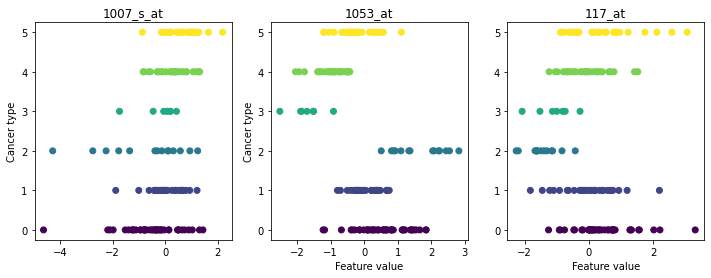

In [12]:
# Plot first feature with color of label
# Make multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# Plot each feature
axes[0].scatter(x=X_norm.iloc[:, 0], y=y, c=y)
axes[1].scatter(x=X_norm.iloc[:, 1], y=y, c=y)
axes[2].scatter(x=X_norm.iloc[:, 2], y=y, c=y)

# Set titles
axes[0].set_title(X.columns[0])
axes[1].set_title(X.columns[1])
axes[2].set_title(X.columns[2])

# Set axes labels
axes[0].set_ylabel('Cancer type')
axes[1].set_xlabel('Feature value')
axes[1].set_ylabel('Cancer type')
axes[2].set_xlabel('Feature value')


## PCA Analysis

Number of components: 90


Text(0, 0.5, 'Explained variance (%)')

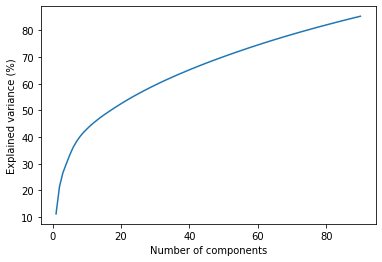

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_norm)
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


### Show 2 PCA components and check correlation

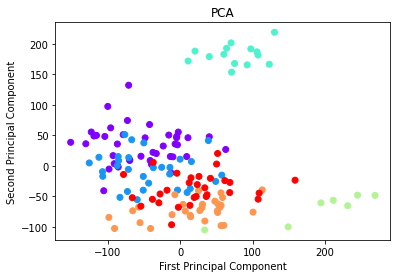

In [14]:
pca = PCA(n_components = 2)
pca.fit(X_norm)
X_pca = pd.DataFrame(pca.transform(X_norm))

# Plot X_pca
plt.title('PCA')
plt.scatter(X_pca[0], X_pca[1], c=y, cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### Show 3 PCA components

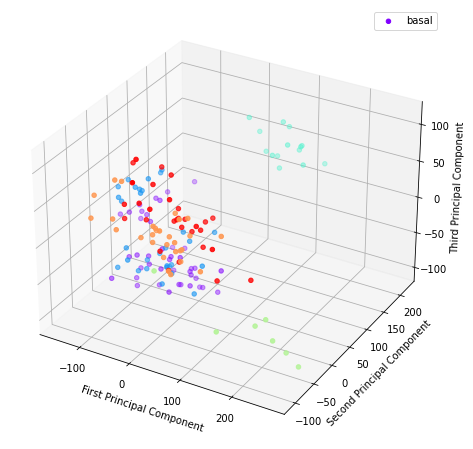

In [15]:
pca = PCA(n_components = 3)
pca.fit(X_norm)
X_pca = pd.DataFrame(pca.transform(X_norm))

# Plot X_pca in 3D
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[0], X_pca[1], X_pca[2], c=y, cmap='rainbow')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.legend(df.type.unique())
plt.show()

### Save dataframe with N PCA components

In [16]:
def save_pca_df(n_components=2):
    pca = PCA(n_components = n_components)
    pca.fit(X_norm)
    X_pca = pd.DataFrame(pca.transform(X_norm))

    X_pca['type'] = y
    save_df(X_pca, '../dataset/Breast_GSE45827_pca{n_components}.csv')

In [17]:
save_pca_df(n_components=10)

## Feature correlation

In [18]:
def correlation_matrices(df, n_features=10):
    # Make multiple subplots
    fig, axes = plt.subplots(n_features, n_features, figsize=(30, 30))
    # Plot each feature
    for i in range(n_features):
        for j in range(n_features):
            axes[i, j].scatter(x=df.iloc[:, i], y=df.iloc[:, j])
            axes[i, j].set_xlabel(df.columns[i])
            axes[i, j].set_ylabel(df.columns[j])

            # Calculate correlation
            corr = df.iloc[:, [i, j]].corr().iloc[0, 1]
            # Set title
            axes[i, j].set_title(f'Correlation: {corr:.2f}')


    fig.suptitle('Correlation between features', fontsize=50, y=0.92)
    plt.show()

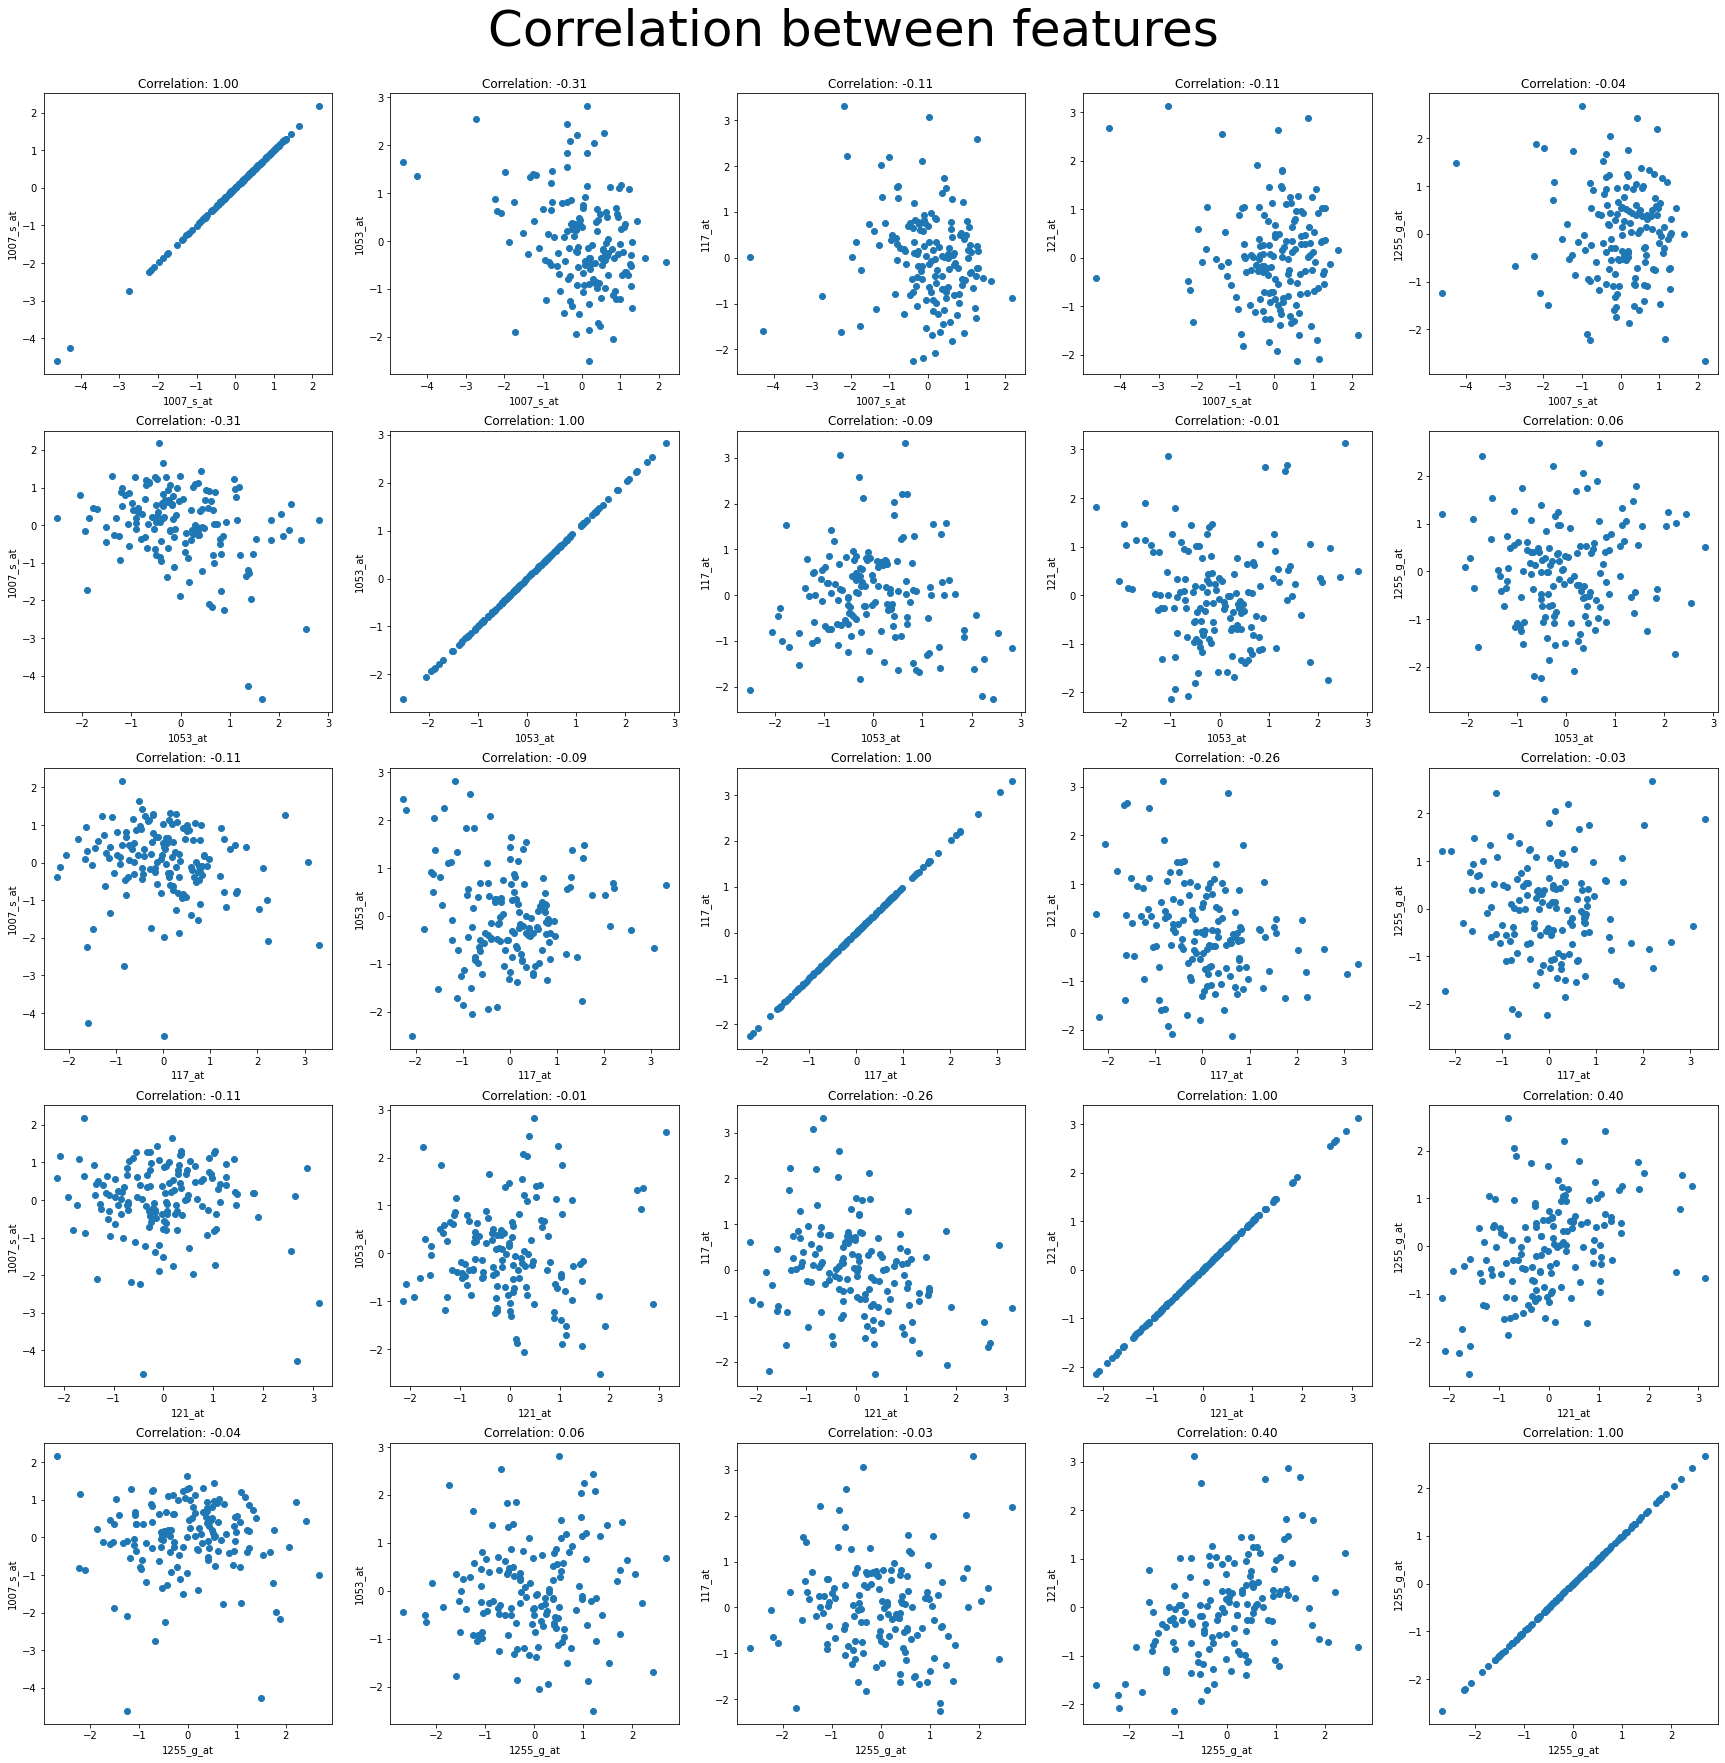

In [19]:
correlation_matrices(X_norm, n_features=5)

In [20]:
def correlated_features(df, n_features=10):
    for i in range(n_features):
        for j in range(i+1, n_features):
            corr = df.iloc[:, [i, j]].corr().iloc[0, 1]
            if corr > 0.9:
                print(f'Correlation between {df.columns[i]} and {df.columns[j]}: {corr:.2f}')

In [23]:
correlated_features(X_norm, n_features=100)

Processing feature 0
Correlation between 1552288_at and 1552289_a_at: 0.93
Correlation between 1552316_a_at and 1552318_at: 0.92
Correlation between 1552348_at and 1552349_a_at: 0.93
Correlation between 1552365_at and 1552367_a_at: 0.94
Correlation between 1552389_at and 1552390_a_at: 0.91
